In [3]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-06-10 11:36:55,060: Credentials are already in use. The existing account in the session will be replaced.


# Gates
Not gates are the 3 pauli matricies they are used by QuantumCircuit.j(n) where $j \in \{X,Y,Z\}$ and n is just an integer and those are $$ Z =  \begin{pmatrix} 1 & 0 \\ 0 & -1  \end{pmatrix},\text{    }  X =  \begin{pmatrix}  0 & 1 \\ 1 & 0 \end{pmatrix},\text{and }  Y =  \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} $$ 

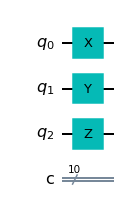

In [19]:
qcx = QuantumCircuit(3,10)
qcx.x(0)
qcx.y(1)
qcx.z(2)
qcx.draw()


### hadmard 
This is super simple we just do QuantumCircuit().h(n) where n is the target qubit, the formula for the hadmard looks like $$ H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} $$ 

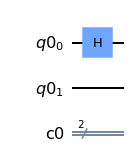

In [6]:
qc_1.h(0)
qc_1.draw('mpl')

### Clifford Gate
This is a specific gate it is done with some QuantumCircuit().s(n) where n is the specific qubit you want to target $$ S = \begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix} $$ 

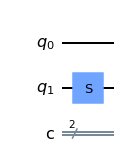

In [7]:
qc_2.s(1)
qc_2.draw()

### adjoint of S gate 
this is just the complex conjugate of S which is pretty simple but I will add the only way to use it is to do QuantumCircuit().sdg(n) where n is the qubit you want to use it on. $$ S^\dagger = \begin{pmatrix} 1 & 0 \\ 0 & -i \end{pmatrix} $$ 

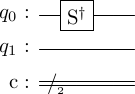

In [16]:
qc_3 = QuantumCircuit(2,2)
qc_3.sdg(0)
qc_3.draw('latex') 

### Reset gate 
This is a way to reset everything not really sure how useful this is but it is done in a similar way QuantumCircuit().reset() and it just resets it to the compuational zero state. 

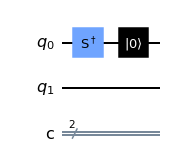

In [17]:
qc_3.reset(0) 
qc_3.draw('mpl') 

### Swap Gate
This is a pretty straight forward gate we see that it is applied the same way as the previous gates with no surprise QuantumCircuit().swap(n,m) where m and n are the two qubits you want to swap looking on a 2 qubut swap we see that it looks like: $$ \text{Swap(0,3)} = \begin{pmatrix} 0 & 0 & 0 & 1 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 1 & 0 & 0 & 0 \end{pmatrix} $$ 

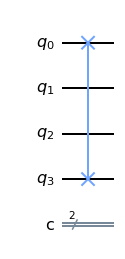

In [20]:
qcswap = QuantumCircuit(4,2)
qcswap.swap(0,3)
qcswap.draw() 

### Controlled not gate
This is a specific gate that has so many different applications in quantum computation so it is a gate that works as an XOR gate so we can se if your qubit has a 1 in the first qubit then you add a 1 to the next qubit it looks like:

$$ cx = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$$

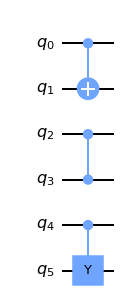

In [16]:
cnot_circuit = QuantumCircuit(6) 


cnot_circuit.cx(0,1) 
cnot_circuit.cz(2,3) 
cnot_circuit.cy(4,5) 


cnot_circuit.draw() 

### controlled phase gate
This gate is specifically if and only if you have $|11\rangle$ you will get a phase on both qubits with value $\frac{\theta}{2}$. it is applied with 

QuantumCircuit().cp($\theta$, control, target ) where $\theta$ is just the phase and the control is the first qubit and target is the second qubit:

$$ cp = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\theta} \end{pmatrix} $$ 

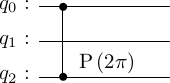

In [19]:
phase_gate = QuantumCircuit(3) 

phase_gate.cp( 2* np.pi,0,2 ) 

phase_gate.draw('latex')


### Rotation gates
So these are a little more complicated it is basically just $ e^{-i\sigma_j/2} $ where $j \in \{X,Y,Z\}$ and they are usually parameterized by some value but it is applied QuantumCircuit().rj($\theta/2$, n):

$$ Rx = \begin{pmatrix} \cos\left(\frac{\theta}{2}\right) & -i\sin\left(\frac{\theta}{2}\right) \\ -i\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)\end{pmatrix}  , \text{ } Ry = \begin{pmatrix} \cos\left(\frac{\theta}{2}\right) & -\sin\left(\frac{\theta}{2}\right) \\ \sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right) \end{pmatrix}  ,\text{ and } Rz = \begin{pmatrix} e^{-i \frac{\theta}{2}} & 0 \\ 0 & e^{-i \frac{\theta}{2}} \end{pmatrix}$$

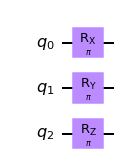

In [20]:
rotations = QuantumCircuit(3) 

rotations.rx(np.pi,0) 
rotations.ry(np.pi,1) 
rotations.rz(np.pi,2)

rotations.draw()

### to_gate()
this is an attribute of the QuantumCircuit() so you can call it by just doing any:

```
qc = QuantumCirucuit(m,n,name = 'Your_mom_gate') 

between this we just do our operations
 
qc.to_gate()
```
this makes the circuit into a gate. 

In [8]:
qc_gate = QuantumCircuit(2,name = 'Kedree_gate')
qc_gate.h(1)
qc_gate.cx(0,1) 
qc_gate.rx(np.pi * 2 , 1) 
qc_gate.to_gate() 

Instruction(name='Kedree_gate', num_qubits=2, num_clbits=0, params=[])

### Append, Barrier, and Measure
Yes as you can see in the last part we have made an instruction which is the class in which all useable gates live, so in order to use it we have to append it to an already existing circuit. we do this the same as we would a list but we have to make sure that what we are appending does not have any classical bits. We can aslo split it by using a barrier this is just to section off your circiut for readability via. QuantumCircuit().barrier(), and finally we can measure with the command QuantumCircuit().measure(p,q) where p and q are either lists of integers or single integers where if lists then p = [a,b,c,d,e] and q = [j,k,l,;,'] and we can say a maps to j and b maps to k ... so we finally measure what what the Kedree_gate does to the Steven quantum circuit: 

```
qc_steven = QuantumCircuit(4,2, name = 'Steven_is_vice_president')
qc_steven.h(1)
qc_steven.ry(np.pi * 2 , 3 ) 
qc_steven.swap(0,3) 
qc_steven.swap(2,1) 
qc_steven.cp(np.pi, 1,3) 

qc_steven.barrier()

qc_steven.append(Kedree_gate,[0,1])
qc_steven.append(Kedree_gate,[2,3])

qc_steven.barrier()

qc_steven.measure([1,3],[0,1])

qc_steven.draw()
```
This should draw a new gate inside of steven and a bunch of other stuff! 

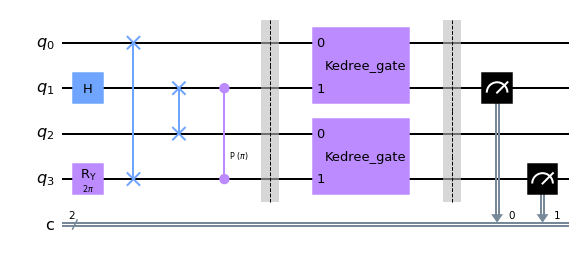

In [15]:
qc_steven = QuantumCircuit(4,2, name = 'Steven_is_vice_president')
qc_steven.h(1)
qc_steven.ry(np.pi * 2 , 3 ) 
qc_steven.swap(0,3) 
qc_steven.swap(2,1) 
qc_steven.cp(np.pi, 1,3) 

qc_steven.barrier()

qc_steven.append(qc_gate,[0,1])
qc_steven.append(qc_gate,[2,3])

qc_steven.barrier()

qc_steven.measure([1,3],[0,1])

qc_steven.draw()

### qasm_simulator, execute, histogram
for this we need to define a simulator to work on in the backend and we do this with the command Aer.get_backend('') in this argument you can only use the available backend whether that is pulse or statevector simulators I think that is all of them then you have to define the number of shots you want I think it is default 512, finally we have to store the execution in some variable and we call that usually job and we say execute(QuantumCircuit(),simulator/provider,shots = shots) and then we output an AerJob class which has attribute result() which has all those attributes look at the cell below and we just want to get the counts in this specific so we can call the attribute with job.result().get_counts('') and then we can plot on a histagram with plot_histogram(counts).


In [26]:
print(result)

Result(backend_name='qasm_simulator', backend_version='0.10.4', qobj_id='a82ed004-6a7b-4f1e-a352-a18ca7e81d8a', job_id='227d75c3-0012-4247-a4f1-c8f79cc79ca0', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 243, '0x1': 269, '0x2': 275, '0x0': 237}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=3.141592653589793, memory_slots=2, metadata={}, n_qubits=4, name='Steven_is_vice_president', qreg_sizes=[['q', 4]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3]]), status=DONE, seed_simulator=3116465554, metadata={'parallel_state_update': 8, 'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'device': 'CPU', 'num_qubits': 4, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'statevector', 'active_input_qubits': [0, 1, 2, 3], 'num_clbits': 2, 'input_qubit_map': [[3, 3], [2, 2], [0, 0], [1, 1]], 'fusion': {'applied': False, 'max_

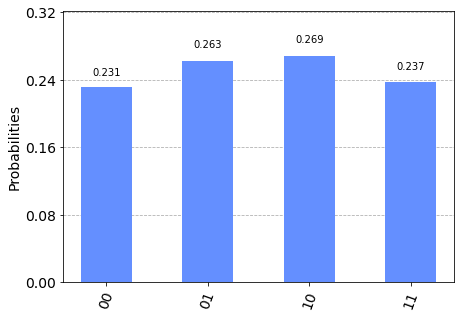

In [23]:
simulator = Aer.get_backend('qasm_simulator')
shots = 1024

job = execute(qc_steven,simulator,shots = shots)

result = job.result()

counts = result.get_counts('Steven_is_vice_president') 

plot_histogram(counts)
